In [184]:
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\\量化投资：以Python为工具\\Python Quant Book\\part 5\\033')

In [185]:
import pandas as pd
import numpy as np
CJSecurities=pd.read_csv('CJSecurities.csv',index_col='Date')
CJSecurities=CJSecurities.iloc[:,1:]
CJSecurities.index=pd.to_datetime(CJSecurities.index)
CJSecurities.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,10.42,10.42,10.20,10.27,54734700
2014-01-03,10.21,10.22,9.86,9.88,88544000
2014-01-06,9.88,9.97,9.71,9.80,67493100
2014-01-07,9.69,9.83,9.60,9.61,52957200
2014-01-08,9.67,9.91,9.65,9.77,55127700


G:\freecloud\ThinkpadC_space\Desktop\资料\资料\量化投资：以Python为工具\Python Quant Book\part 5\033\candle.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  seriesData['Date']=Date


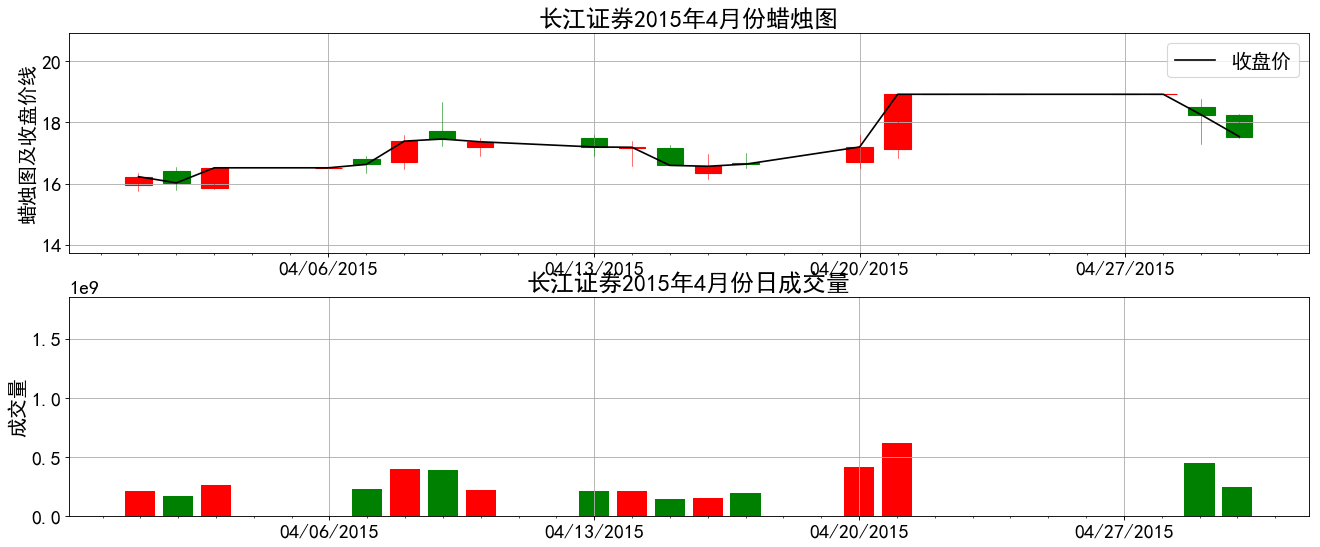

In [186]:
from candle import candleVolume
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8),dpi=80)
plt.rc('font', family='SimHei', size=18)
CJSecurities1=CJSecurities['2015-04-01':'2015-04-30']
candleVolume(CJSecurities1,candletitle='长江证券2015年4月份蜡烛图',\
             bartitle='长江证券2015年4月份日成交量')

G:\freecloud\ThinkpadC_space\Desktop\资料\资料\量化投资：以Python为工具\Python Quant Book\part 5\033\candle.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  seriesData['Date']=Date


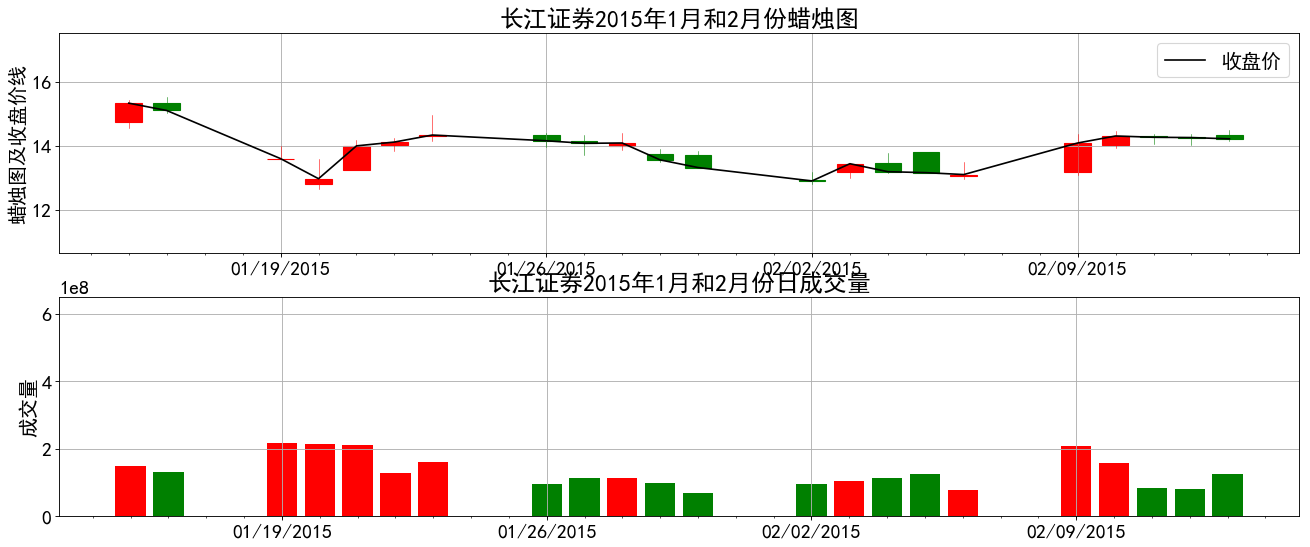

In [187]:
CJSecurities2=CJSecurities['2015-01-15':'2015-02-15']
plt.figure(figsize=(20,8),dpi=80)
plt.rc('font', family='SimHei', size=18)
candleVolume(CJSecurities2,candletitle='长江证券2015年1月和2月份蜡烛图',\
            bartitle='长江证券2015年1月和2月份日成交量')

G:\freecloud\ThinkpadC_space\Desktop\资料\资料\量化投资：以Python为工具\Python Quant Book\part 5\033\candle.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  seriesData['Date']=Date


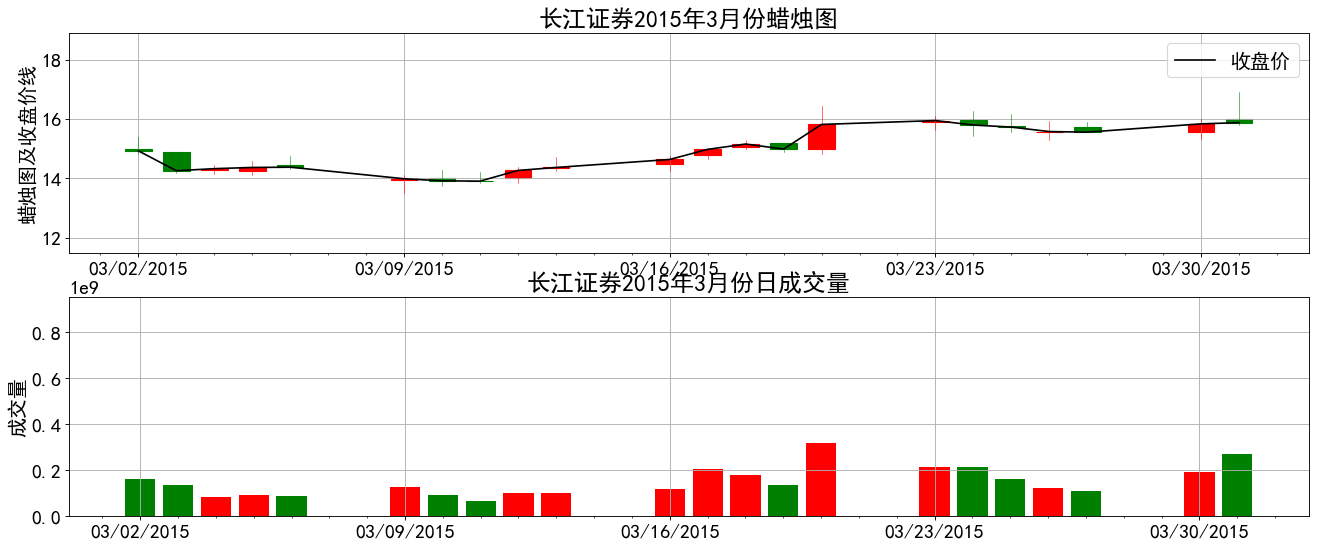

In [188]:
CJSecurities3=CJSecurities['2015-03-01':'2015-03-31']
plt.figure(figsize=(20,8),dpi=80)
plt.rc('font', family='SimHei', size=18)
candleVolume(CJSecurities3,candletitle='长江证券2015年3月份蜡烛图',\
             bartitle='长江证券2015年3月份日成交量')

G:\freecloud\ThinkpadC_space\Desktop\资料\资料\量化投资：以Python为工具\Python Quant Book\part 5\033\candle.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  seriesData['Date']=Date


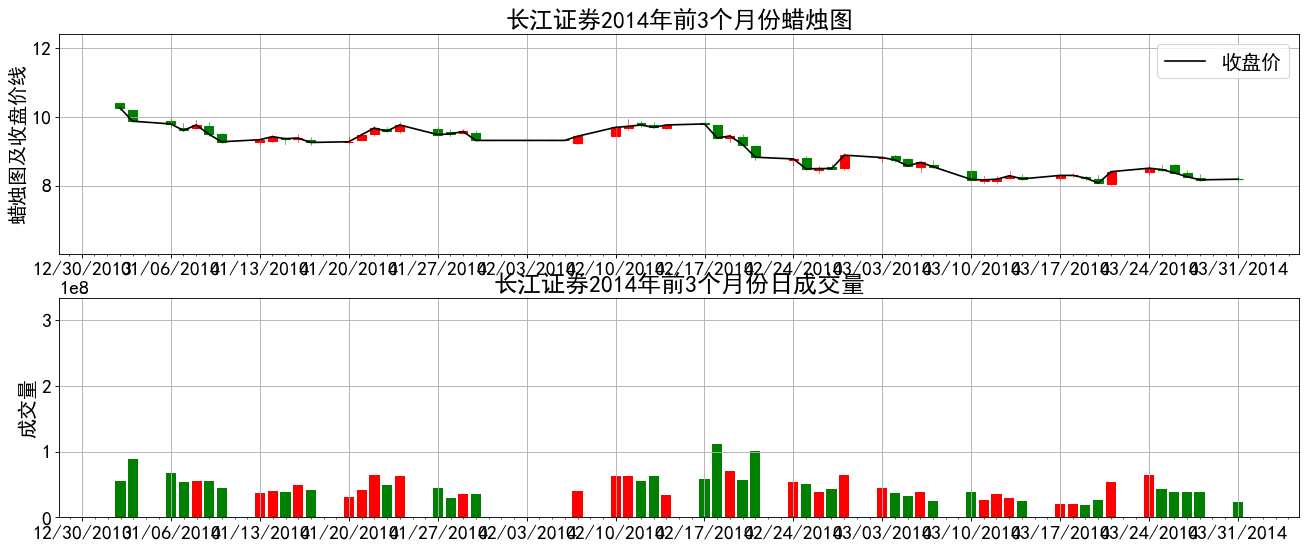

In [189]:
CJSecurities4=CJSecurities['2014-01-02':'2014-03-31']
plt.figure(figsize=(20,8),dpi=80)
plt.rc('font', family='SimHei', size=18)
candleVolume(CJSecurities4,candletitle='长江证券2014年前3个月份蜡烛图',\
            bartitle='长江证券2014年前3个月份日成交量')

In [190]:
close=CJSecurities.Close
close.describe()

count    345.000000
mean      10.280406
std        3.800972
min        4.490000
25%        6.980000
50%        9.380000
75%       14.120000
max       18.920000
Name: Close, dtype: float64

In [191]:
BreakClose=np.ceil(close/2)*2
BreakClose.name='BreakClose'
pd.DataFrame({'BreakClose':BreakClose,\
            'Close':close}).head(n=2)

,BreakClose,Close
Date,,
2014-01-02,12.0,10.27
2014-01-03,10.0,9.88


In [192]:
volume=CJSecurities.Volume

PrcChange=close.diff()

In [193]:
UpVol=volume.replace(volume[PrcChange>0],0)
UpVol[0]=0
DownVol=volume.replace(volume[PrcChange<=0],0)
DownVol[0]=0

In [194]:
def VOblock(vol):
    return([np.sum(vol[BreakClose==x]) for x in range(6,22,2)])

In [195]:
cumUpVol=VOblock(UpVol)
cumDownVol=VOblock(DownVol)
ALLVol=np.array([cumUpVol,cumDownVol]).transpose()

# 之下的图1为notebook生成图像，图2为Spyder3.6生成图像

E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  # Remove the CWD from sys.path while we load stuff.
E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  # This is added back by InteractiveShellApp.init_path()


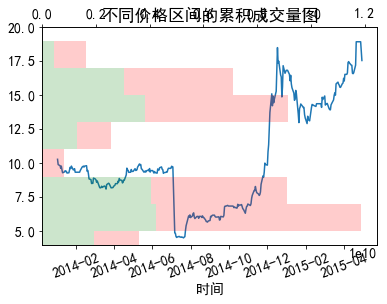

In [196]:
plt.rc('font', family='SimHei', size=14)
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax1=ax.twiny()
ax.plot(close)
ax.set_title('不同价格区间的累积成交量图')
ax.set_ylim(4,20)
ax.set_xlabel('时间')
plt.setp(ax.get_xticklabels(), rotation=20,horizontalalignment='center')
ax1.barh(bottom=range(4,20,2),width=ALLVol[:,0],\
         height=2,color='g',alpha=0.2)
ax1.barh(bottom=range(4,20,2),width=ALLVol[:,1],height=2,left=ALLVol[:,0],\
        color='r',alpha=0.2)
plt.show()

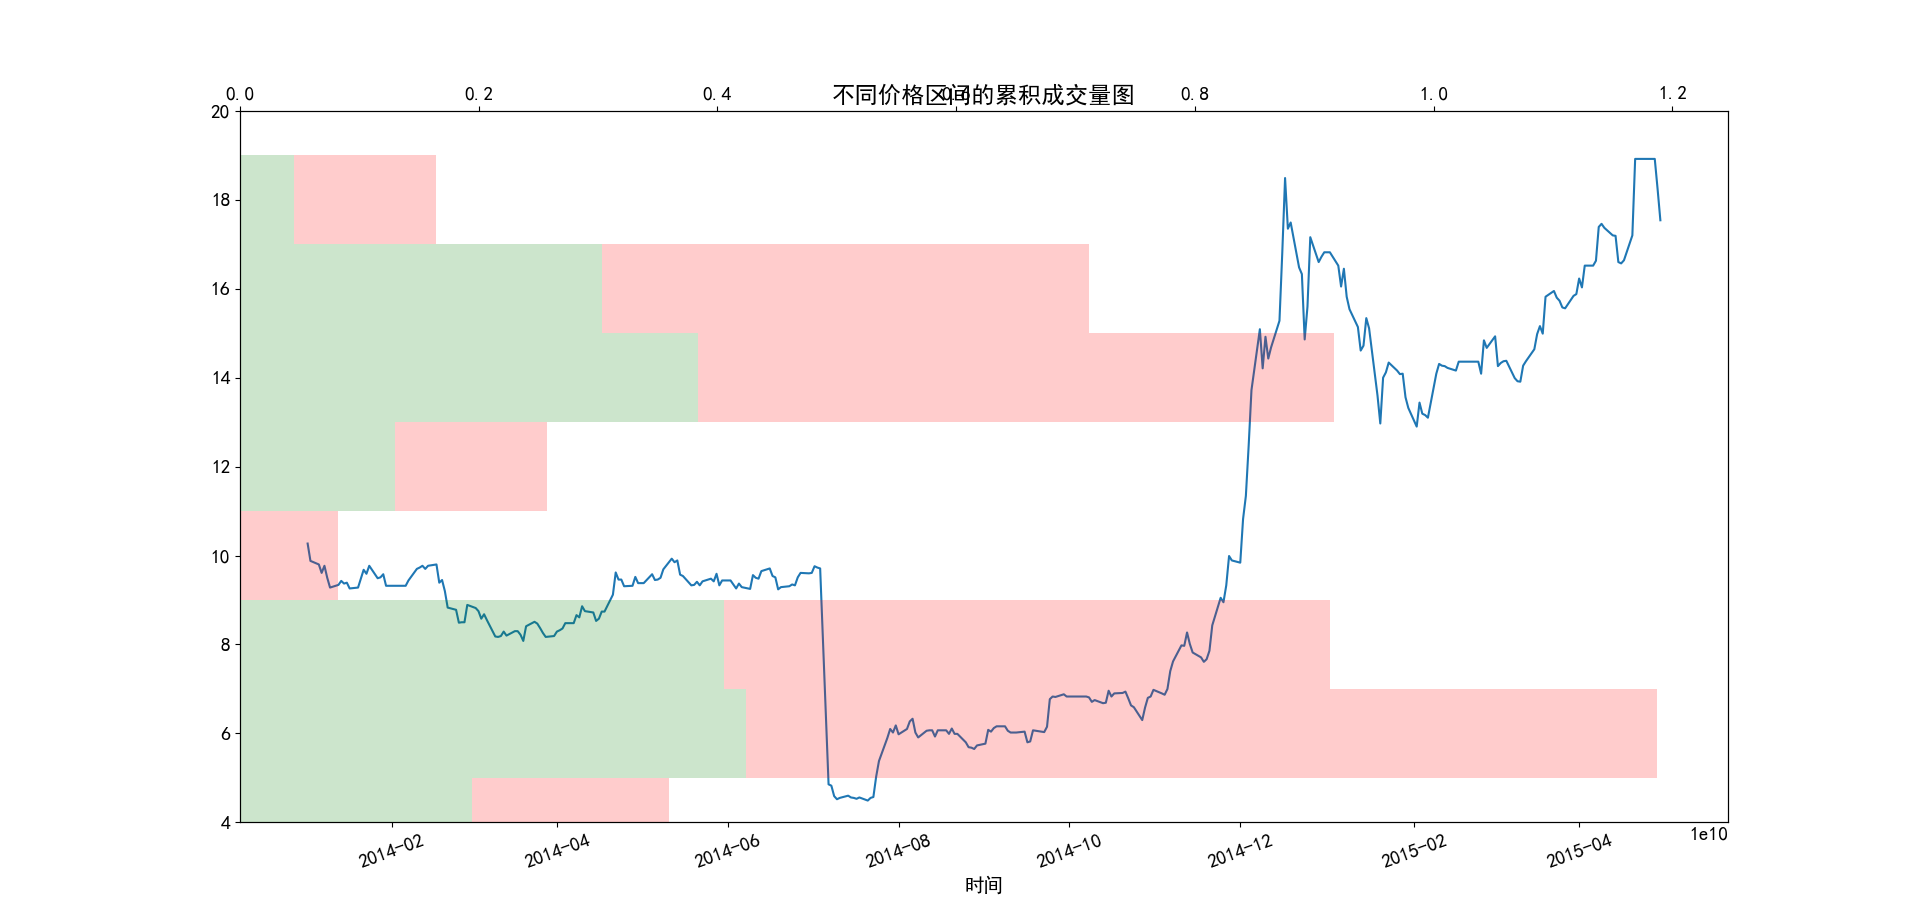

In [197]:
volume=CJSecurities.Volume
VolSMA5=pd.rolling_apply(volume,5,np.mean).dropna()
VolSMA10=pd.rolling_apply(volume,10,np.mean).dropna()
VolSMA=((VolSMA5+VolSMA10)/2).dropna()
VolSMA.head(n=3)

E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  
E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  This is separate from the ipykernel package so we can avoid doing imports until


Date
2014-01-15    48229480.0
2014-01-16    47371565.0
2014-01-17    44652390.0
Name: Volume, dtype: float64

In [198]:
VolSignal=(volume[-len(VolSMA):]>VolSMA)*1
VolSignal[VolSignal==0]=-1
VolSignal.head()

Date
2014-01-15   -1
2014-01-16    1
2014-01-17   -1
2014-01-20   -1
2014-01-21    1
Name: Volume, dtype: int32

In [199]:
close=CJSecurities.Close
PrcSMA5=pd.rolling_apply(close,5,np.mean).dropna()
PrcSMA20=pd.rolling_apply(close,20,np.mean).dropna()

E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  
E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  This is separate from the ipykernel package so we can avoid doing imports until


In [200]:
def upbreak(Line,RefLine):
    signal=np.all([Line>RefLine,Line.shift(1)<RefLine.shift(1)],axis=0)
    return(pd.Series(signal[1:],index=Line.index[1:]))
def downbreak(Line,RefLine):
    signal=np.all([Line<RefLine,Line.shift(1)>RefLine.shift(1)],axis=0)
    return(pd.Series(signal[1:],index=Line.index[1:]))

In [201]:
UpSMA=upbreak(PrcSMA5[-len(PrcSMA20):],PrcSMA20)*1
DownSMA=downbreak(PrcSMA5[-len(PrcSMA20):],PrcSMA20)*1
SMAsignal=UpSMA-DownSMA
VolSignal=VolSignal[-len(SMAsignal):]
signal=VolSignal+SMAsignal
signal.describe()

count    325.00000
mean      -0.12000
std        1.05163
min       -2.00000
25%       -1.00000
50%       -1.00000
75%        1.00000
max        2.00000
dtype: float64

In [202]:
trade=signal.replace([2,-2,1,-1,0],[1,-1,0,0,0])
trade=trade.shift(1)[1:]
trade.head()

Date
2014-01-31    0.0
2014-02-03   -1.0
2014-02-05    0.0
2014-02-06    0.0
2014-02-07    0.0
dtype: float64

In [203]:
ret=((close-close.shift(1))/close.shift(1))['2014-01-31':]
ret.name='stockRet'
tradeRet=trade*ret
tradeRet.name='tradeRet'
winRate=len(tradeRet[tradeRet>0])/len(tradeRet[tradeRet!=0])
winRate

0.8461538461538461

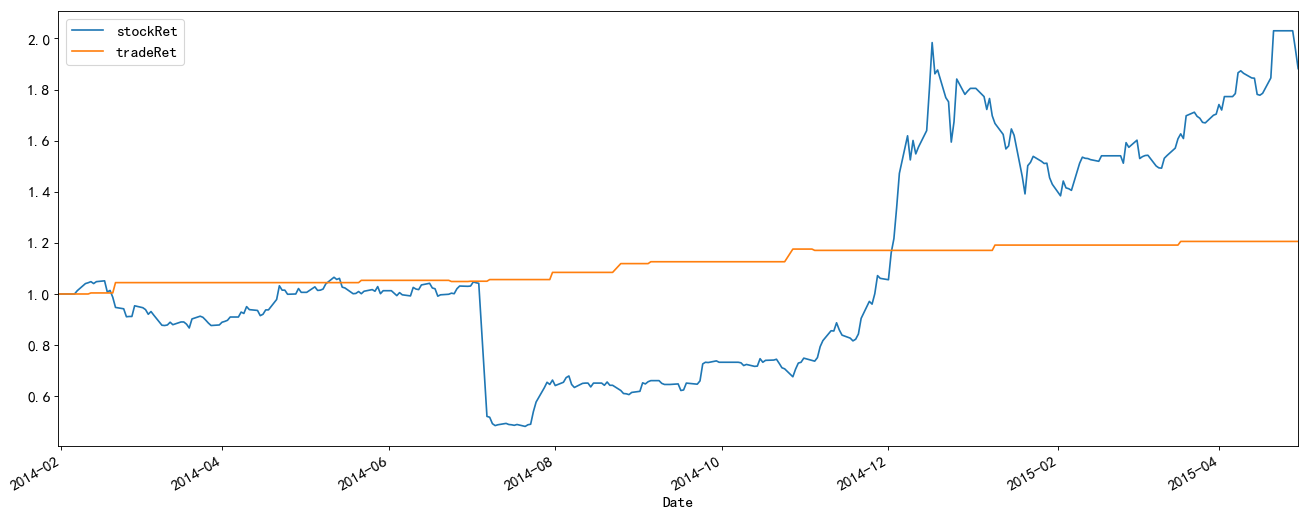

In [204]:
plt.figure(figsize=(20,8),dpi=80)
(1+ret).cumprod().plot(label='stockRet')
(1+tradeRet).cumprod().plot(label='tradeRet')
plt.legend()
plt.show()

In [205]:
def Hold(signal):
    hold=np.zeros(len(signal))
    for index in range(1,len(hold)):
        if hold[index-1]==0 and signal[index]==1:
            hold[index]=1
        elif hold[index-1]==1 and signal[index]==1:
            hold[index]=1
        elif hold[index-1]==1 and signal[index]==0:
            hold[index]=1
    return(pd.Series(hold,index=signal.index))

In [206]:
hold=Hold(trade)

In [207]:
def TradeSim(price,hold):
    position=pd.Series(np.zeros(len(price)),index=price.index)
    position[hold.index]=hold.values
    cash=20000*np.ones(len(price))
    for t in range(1,len(price)):
        if position[t-1]==0 and position[t]>0:
            cash[t]=cash[t-1]-price[t]*1000
        if position[t-1]>=1 and position[t]==0:
            cash[t]=cash[t-1]+price[t]*1000
        if position[t-1]==position[t]:
            cash[t]=cash[t-1]
    asset=cash+price*position*1000
    asset.name='asset'
    account=pd.DataFrame({'asset':asset,'cash':cash,'position':position})
    return(account)

E:\Data_analysis_plan\python_36_install\lib\site-packages\pandas\plotting\_core.py:1694: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


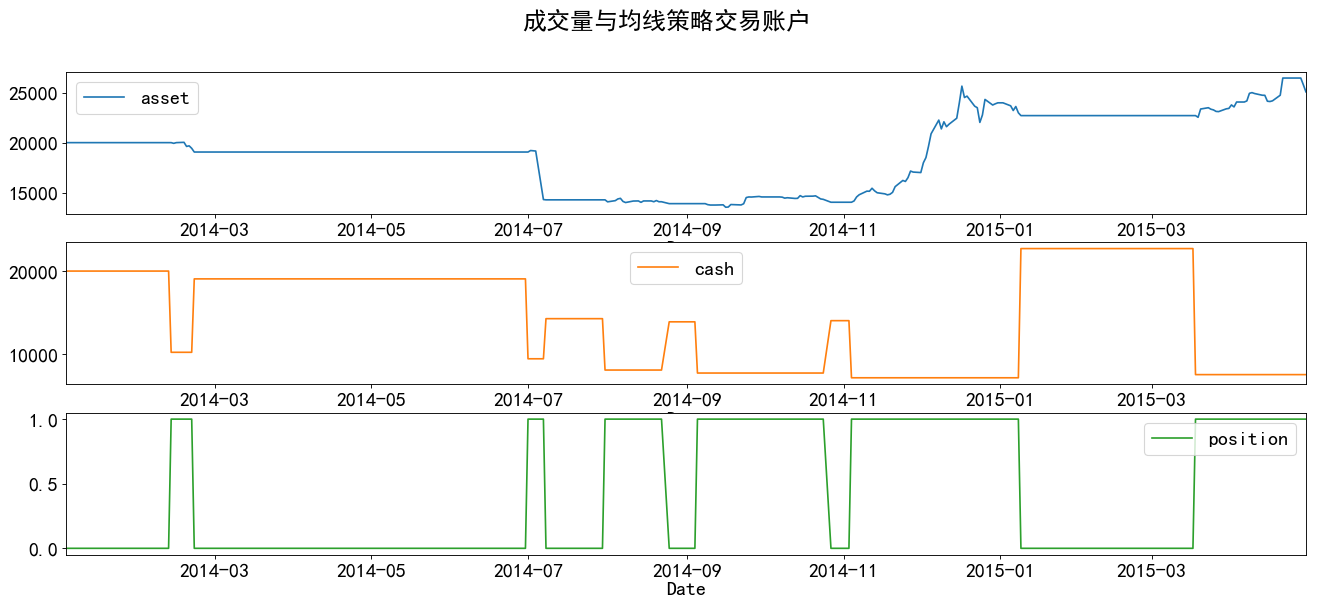

In [209]:
TradeAccount=TradeSim(close,hold)
TradeAccount.tail()
plt.figure(figsize=(20,8),dpi=80)
plt.rc('font', family='SimHei', size=18)
axe1=plt.subplot(111)
#在第一个画面中画出序列的自相关系数图 
plot1=TradeAccount.plot(subplots=True,\
        title='成交量与均线策略交易账户',ax=axe1)
plt.legend()
plt.show()

In [211]:
print('成交量与均线策略交易账户收益为: {:.5%}'.format((TradeAccount.asset[-1]-TradeAccount.asset[0])/TradeAccount.asset[0]))

成交量与均线策略交易账户收益为: 25.42500%


In [212]:
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\量化投资：以Python为工具\\PythonANS')
import pandas as pd
import numpy as np
import movingAverage as ma
import matplotlib.pyplot as plt
import candle

# 1.获取长江证券股票2013年度日交易数据，绘制K线图和成交量图(图示大小问题可用Spyder3.6解决)

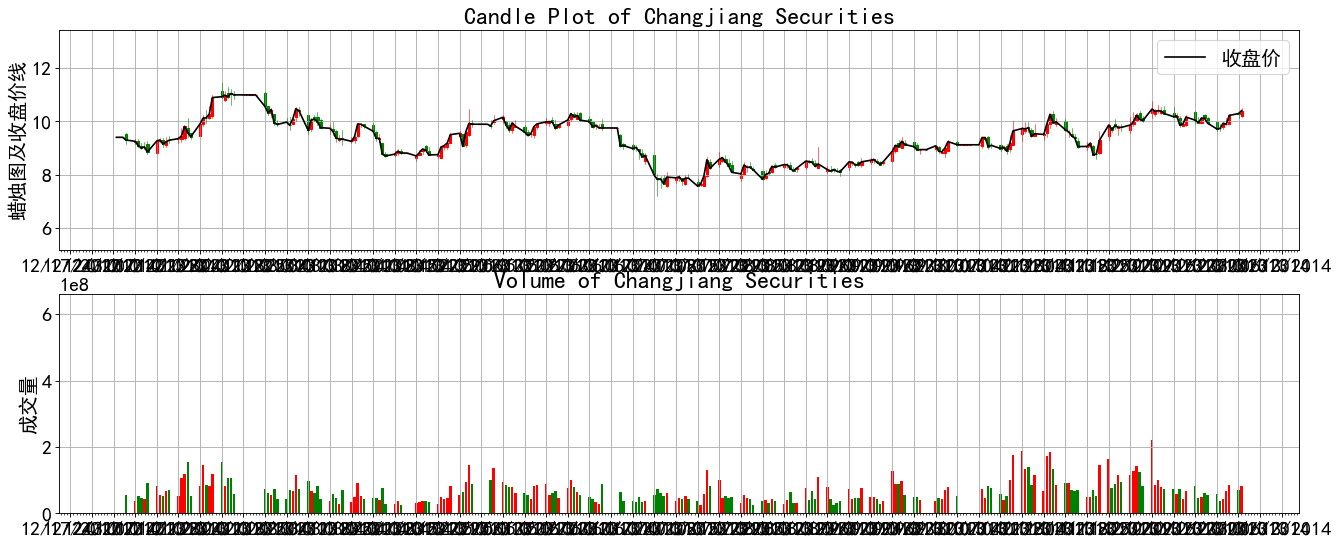

In [213]:
cjzq = pd.read_csv('Data/Part5/007/problem33-1.csv',
                index_col='date')
cjzq.index.name='Date'

cjzq.index = pd.to_datetime(cjzq.index,format='%Y-%m-%d')

plt.figure(figsize=(20,8),dpi=80)
plt.rc('font', family='SimHei', size=18)

candle.candleVolume(cjzq,
    candletitle='Candle Plot of Changjiang Securities',
    bartitle='Volume of Changjiang Securities')

# 2.使用上题原数据，绘制长江证券股票不同价位段成交量图(图示大小问题可用Spyder3.6解决)

In [214]:
close = cjzq.Close

close.describe()

count    260.000000
mean       9.335538
std        0.784656
min        7.570000
25%        8.802500
50%        9.385000
75%        9.900000
max       11.040000
Name: Close, dtype: float64

In [215]:
BreakClose = np.ceil(close)
BreakClose.name = 'BreakClose'

volume = cjzq.Volume
PrcChange = close.diff()

UpVol = volume.replace(volume[PrcChange>0],0)
UpVol[0] = 0

DownVol = volume.replace(volume[PrcChange<=0],0)
DownVol[0] = 0

In [216]:
def VOblock(vol):
    return([np.sum(vol[BreakClose==x]) for x in range(6,12)])

In [217]:
cumUpVol = VOblock(UpVol)
cumDownVol = VOblock(DownVol)

ALLVol = np.array([cumUpVol,cumDownVol]).transpose()

E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  if sys.path[0] == '':
E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  


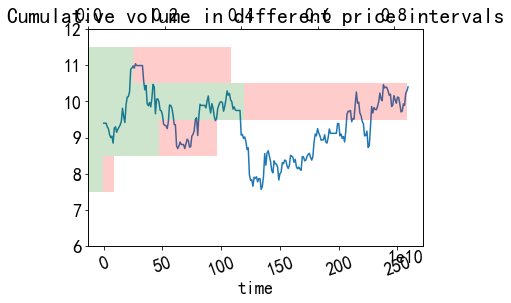

In [218]:
fig,ax=plt.subplots()
ax1=ax.twiny()
ax.plot(close)
ax.set_title('Cumulative volume in different price intervals')
ax.set_ylim(6,12)
ax.set_xlabel('time')


plt.setp(ax.get_xticklabels(), rotation=20,horizontalalignment='center')

ax1.barh(bottom=range(6,12),width=ALLVol[:,0],
         height=1,color='g',alpha=0.2)        
ax1.barh(bottom=range(6,12),width=ALLVol[:,1],height=1,left=ALLVol[:,0],
        color='r',alpha=0.2)
plt.show()

# 3.加权移动平均价是用成交量作为各个价位段的权重所生成的指标，取6日为其计算周期，使用第1题的原数据，绘制其成交量加权平均价并绘制曲线图

In [219]:
VoMA = np.zeros(len(cjzq))
for i in range(5,len(cjzq)):
    Volume = volume[i-5:i]
    Close = close[i-5:i]
    VoMA[i] = sum(Close * Volume / sum(Volume))
VoMA = pd.Series(VoMA,index = cjzq.index).replace(0,np.nan).dropna()

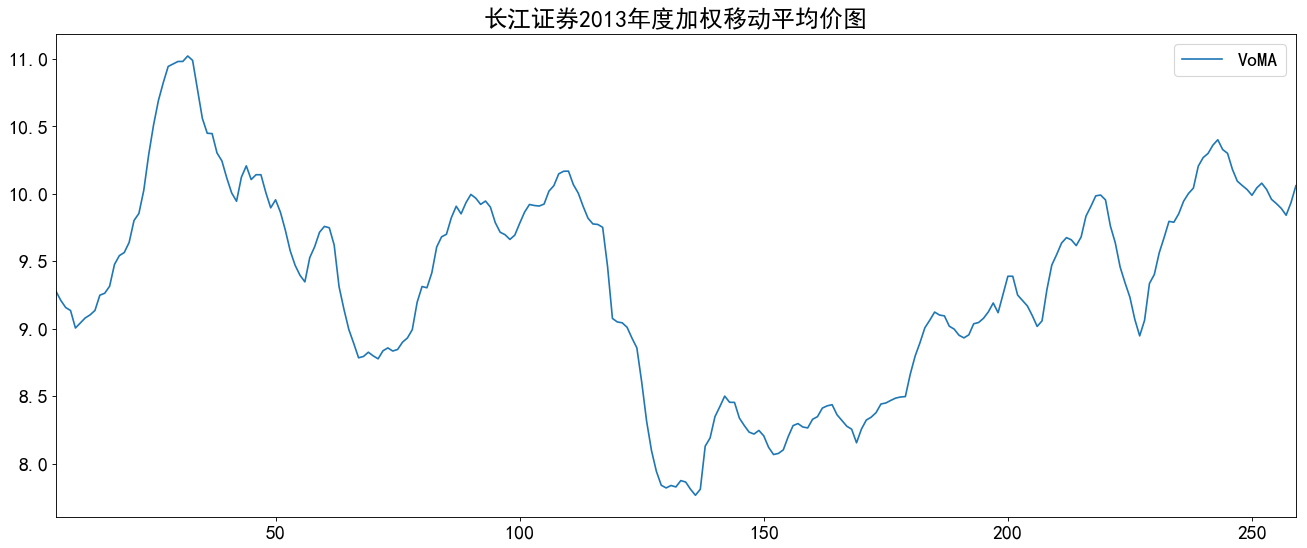

In [220]:
plt.figure(figsize=(20,8),dpi=80)
plt.rc('font', family='SimHei', size=18)
axe1=plt.subplot(111)
#在第一个画面中画出序列的自相关系数图 
plot1=VoMA.plot(ax=axe1,label='VoMA')
plt.title('长江证券2013年度加权移动平均价图')
plt.legend()
plt.show()

# 4.将上题所得的计算数据与布林带突破线相联系，将成交量加权平均价加上其1.5倍作为通道上轨，成交量加权平均价减去其1.5倍作为通道下轨。按布林带通道线的交易策略规则，根据收盘价与这三条线的关系释放出买卖信号，以第一题中的原数据为分析对象，进行策略回测

In [221]:
midbound = VoMA

upbound = midbound + 1.5 * pd.rolling_std(midbound,6)

lowbound = midbound - 1.5 * pd.rolling_std(midbound,6)

dat = pd.concat([close,upbound,lowbound],1).dropna()

dat.columns = ['price','upbound','lowbound']

asset = 2000 * np.ones(len(dat))

cash = 2000 * np.ones(len(dat))

share = np.zeros(len(dat))



E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  """


In [222]:
for i in range(1,len(dat)):
    cash[i]=cash[i-1]+share[i-1]*dat.price.values[i]
    asset[i]=cash[i]
    if dat.price.values[i-1]< dat.upbound.values[i-1]:
        share[i]=100
        cash[i]=cash[i]-100*dat.price.values[i]-100*dat.price.values[i]*0.0003
    elif dat.price.values[i-1]>dat.lowbound.values[i-1]:
        share[i]=-100
        cash[i]=cash[i]+100*dat.price.values[i]-100*dat.price.values[i]*0.0003

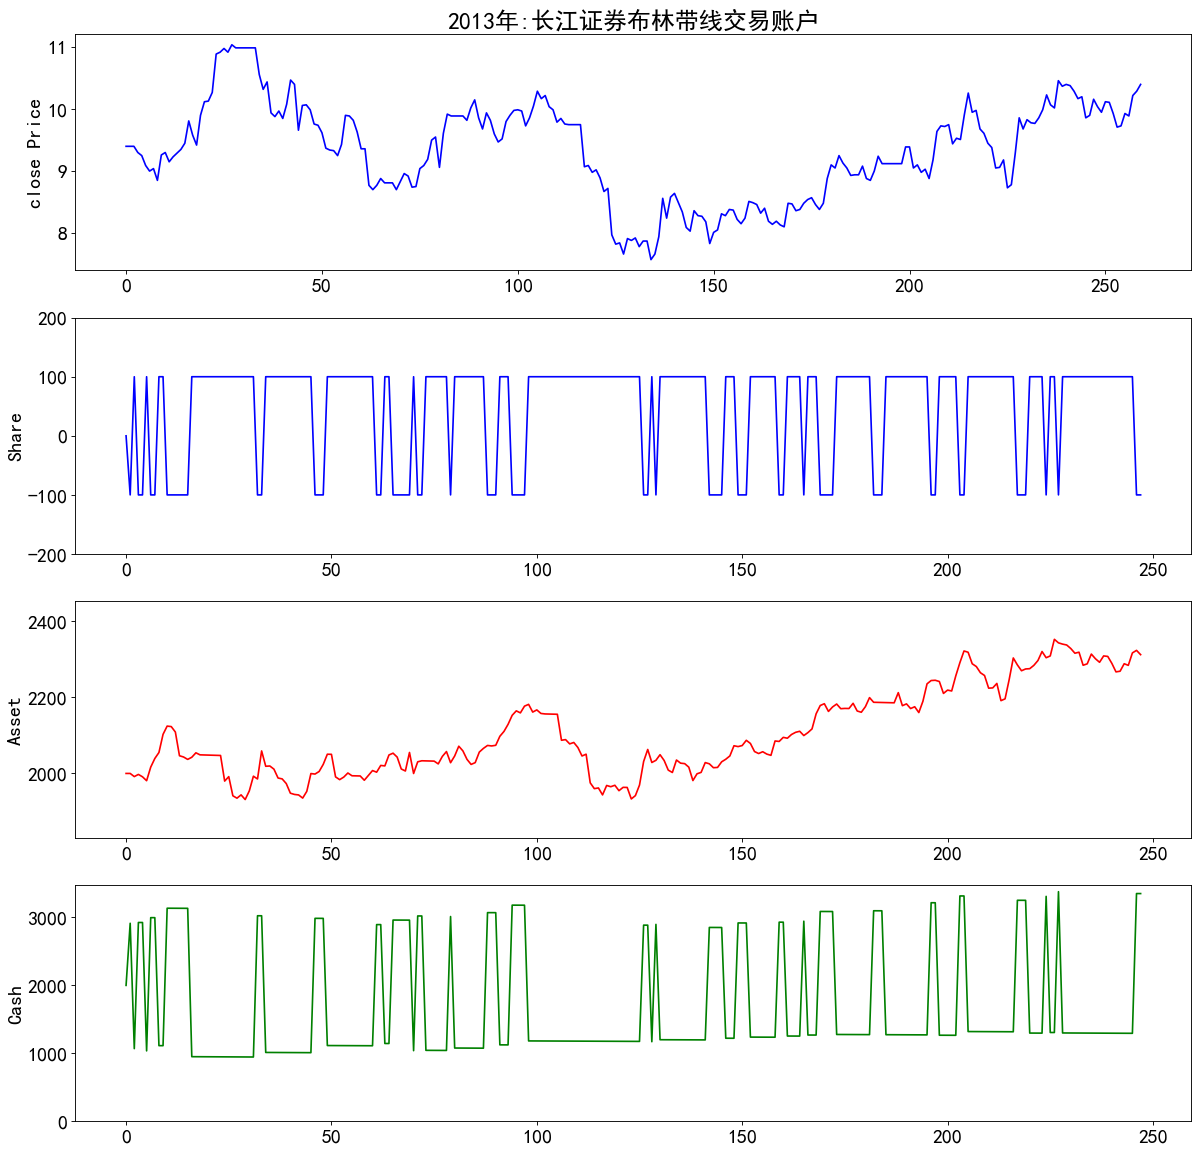

In [223]:
import matplotlib
plt.figure(figsize=(18,18),dpi=80)
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=18)
plt.subplot(411)
plt.title("2013年:长江证券布林带线交易账户")
plt.plot(cjzq.Close, color='b')
plt.ylabel("close Price")

plt.subplot(412)
plt.plot(share, color='b')
plt.ylabel("Share")
plt.ylim(-200,max(share)+100)

plt.subplot(413)
plt.plot(asset,label="asset",color='r')
plt.ylabel("Asset")
plt.ylim(min(asset)-100,max(asset)+100)

plt.subplot(414)
plt.plot(cash, label="cash",color='g')
plt.ylabel("Cash")
plt.ylim(0,max(cash)+100)

plt.show()

In [224]:
ret=(asset[-1]-asset[0])/asset[0]

In [225]:
print('成交量加权平均价与布林带线策略交易收益为: {:.5%}'.format(ret))

成交量加权平均价与布林带线策略交易收益为: 15.60660%
